## Step 1.Import Libraries

In [65]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [66]:
# Loading data
path = "c:\\Users\\sanrkin\\Downloads\\creditcard.csv"
df = pd.read_csv(path)

In [67]:
print("\n=== Dataset Overview ===")


=== Dataset Overview ===


In [68]:
# First few rows
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


PCA transformation is essential for protecting sensitive financial data while maintaining its analytical value for fraud detection.

The V1-V28 features represent transformed versions of original transaction data, making it impossible for malicious actors to reverse-engineer sensitive information.

In [69]:
# Last few rows
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
56957,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,0.915645,...,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42,0
56958,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,0.195362,...,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99,0
56959,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,1.057616,...,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00,0
56960,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,1.350845,...,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00,0
56961,-7.792712,5.599937,0.258943,0.061360,-2.586555,4.770837,-8.221863,-20.298380,2.028566,-0.030694,...,12.641459,-4.187308,2.655058,0.350225,0.462620,0.455248,0.166157,0.099680,8.39,0


In [70]:
print("\n=== Data Info ===")


=== Data Info ===


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56962 non-null  float64
 1   V2      56962 non-null  float64
 2   V3      56962 non-null  float64
 3   V4      56962 non-null  float64
 4   V5      56962 non-null  float64
 5   V6      56962 non-null  float64
 6   V7      56962 non-null  float64
 7   V8      56962 non-null  float64
 8   V9      56962 non-null  float64
 9   V10     56962 non-null  float64
 10  V11     56962 non-null  float64
 11  V12     56962 non-null  float64
 12  V13     56962 non-null  float64
 13  V14     56962 non-null  float64
 14  V15     56962 non-null  float64
 15  V16     56962 non-null  float64
 16  V17     56962 non-null  float64
 17  V18     56962 non-null  float64
 18  V19     56962 non-null  float64
 19  V20     56962 non-null  float64
 20  V21     56962 non-null  float64
 21  V22     56962 non-null  float64
 22

In [72]:
# Statistical info
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,0.013286,0.006610,-0.004263,0.001496,-0.003508,-0.003079,0.000141,-0.006501,0.001564,0.003176,...,-0.002253,-0.004938,0.004008,-0.001017,-0.000872,0.004513,0.001385,-0.001990,87.658797,0.001720
std,1.941231,1.611224,1.516853,1.419107,1.431731,1.359647,1.301800,1.201138,1.103688,1.095156,...,0.735871,0.730301,0.621623,0.604191,0.521003,0.481857,0.416750,0.325640,258.042879,0.041443
min,-36.510583,-47.429676,-48.325589,-5.560118,-113.743307,-20.054615,-28.215112,-41.484823,-9.481456,-20.949192,...,-21.620120,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-8.878665,-15.430084,0.000000,0.000000
25%,-0.908591,-0.600208,-0.893961,-0.847617,-0.694059,-0.770145,-0.551096,-0.211190,-0.642072,-0.535121,...,-0.230210,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.070204,-0.052351,5.615000,0.000000
50%,0.036251,0.061840,0.170910,-0.022094,-0.051828,-0.278939,0.039155,0.019903,-0.052607,-0.095676,...,-0.032379,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.001451,0.011354,21.900000,0.000000
75%,1.319727,0.801163,1.016897,0.738688,0.615454,0.392801,0.569769,0.324905,0.599634,0.453059,...,0.184809,0.524484,0.149985,0.437657,0.348895,0.245286,0.090737,0.077483,77.500000,0.000000
max,2.446505,18.902453,3.985446,15.304184,29.016124,73.301626,120.589494,18.282168,10.370658,15.236028,...,22.614889,6.790452,20.803344,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000,1.000000


In [73]:
# columns in the dataset 
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'Target'],
      dtype='object')

In [74]:
# Shape of the dataset
df.shape

(56962, 30)

In [75]:
# Distribution of Fraud vs Normal Transactions
df['Target'].value_counts()

Target
0    56864
1       98
Name: count, dtype: int64

C:\Users\sanrkin\AppData\Local\Temp\ipykernel_3028\2101463207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette=['#2ecc71', '#e74c3c'],  # Green for 0, Red for 1


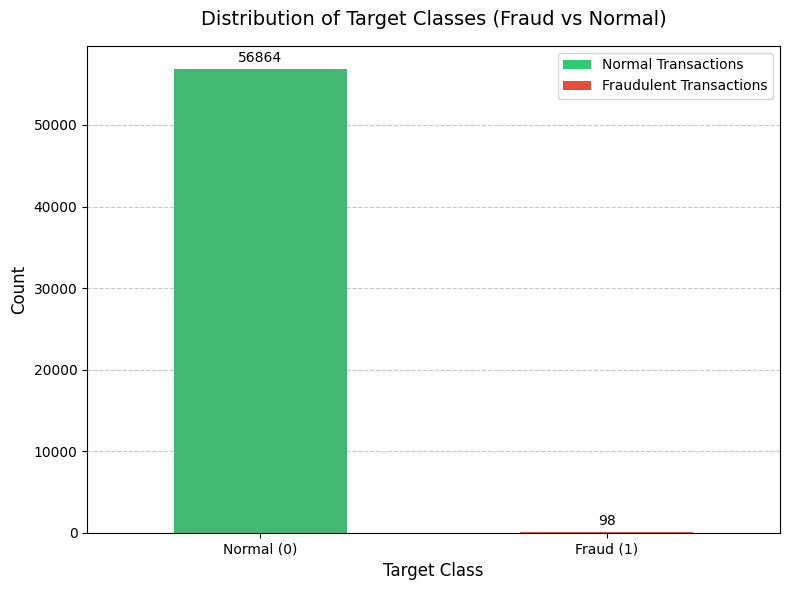

In [76]:
# Plot the distribution of fraud vs non-fraud transactions

plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df, palette=['#2ecc71', '#e74c3c'],  # Green for 0, Red for 1
width=0.5)

plt.title('Distribution of Target Classes (Fraud vs Normal)',fontsize=14, pad=15)
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%d', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ecc71', label='Normal Transactions'),
                  Patch(facecolor='#e74c3c', label='Fraudulent Transactions')]
plt.legend(handles=legend_elements, loc='upper right')

# Adjust layout
plt.tight_layout()

plt.show()

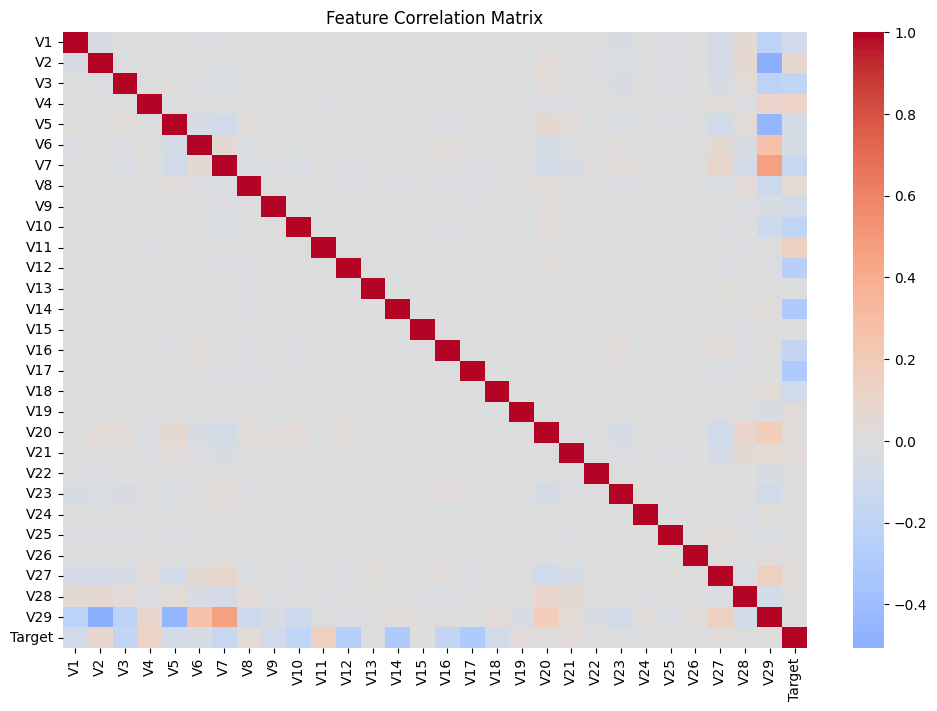

In [77]:
# Heat map

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

Low Multicollinearity: Most features (V1-V28) show low correlation with each other, indicated by the predominantly light-colored squares. This is good for model performance as it suggests that most features provide unique information.

In [78]:
# Missing values 
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
Target    0
dtype: int64

In [79]:
X = df.drop('Target',axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


We used SMOTE to handle the extreme class imbalance in the dataset (~0.17% fraud). In such cases, traditional oversampling (which just duplicates existing fraud cases) can lead to overfitting, and undersampling (which removes normal cases) risks losing important information.

Instead, SMOTE generates new, realistic synthetic fraud examples by learning patterns from existing ones. This helps the model better understand what fraud looks like without just memorizing data.

It also improves something called recall, which means:

"Out of all real frauds, how many did we correctly catch?"

Improving recall is especially important in fraud detection because missing a fraud is much more costly than flagging a normal transaction by mistake.

C:\Users\sanrkin\AppData\Local\Temp\ipykernel_3028\3265927049.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=['#2ecc71', '#e74c3c'])
C:\Users\sanrkin\AppData\Local\Temp\ipykernel_3028\3265927049.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette=['#2ecc71', '#e74c3c'])


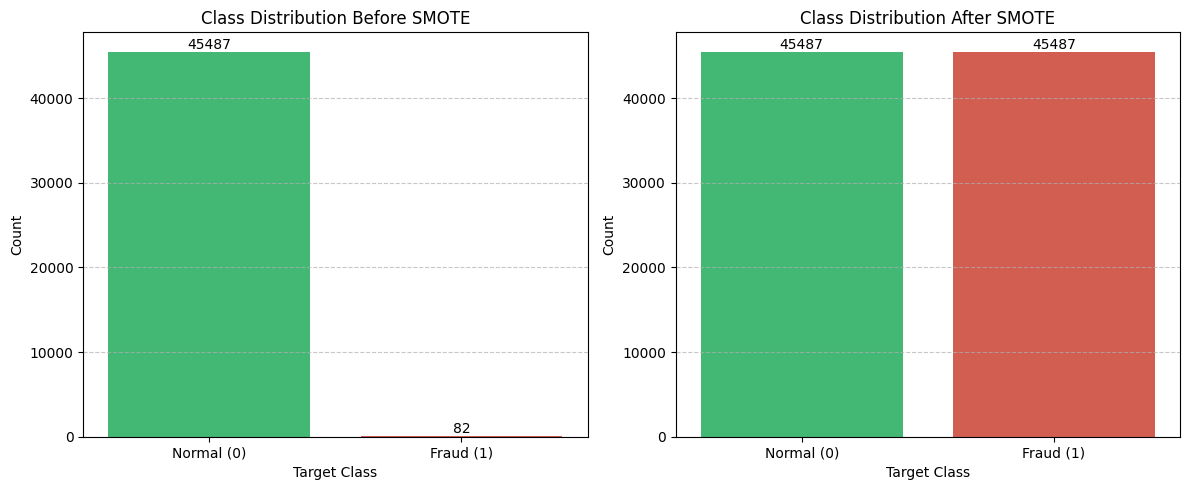


Class distribution before SMOTE:
Target
0    45487
1       82
Name: count, dtype: int64

Class distribution after SMOTE:
Target
0    45487
1    45487
Name: count, dtype: int64


In [81]:
 # Plot the distribution of fraud vs non-fraud transactions before and after SMOTE
plt.figure(figsize=(12, 5))

# Plot 1: Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i in plt.gca().containers:
    plt.gca().bar_label(i)

# Plot 2: After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.tight_layout()
plt.show()

print("\nClass distribution before SMOTE:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())



===== Logistic Regression =====
Confusion Matrix:
 [[11175   202]
 [    2    14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     11377
           1       0.06      0.88      0.12        16

    accuracy                           0.98     11393
   macro avg       0.53      0.93      0.56     11393
weighted avg       1.00      0.98      0.99     11393

ROC AUC Score: 0.9374


C:\Users\sanrkin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


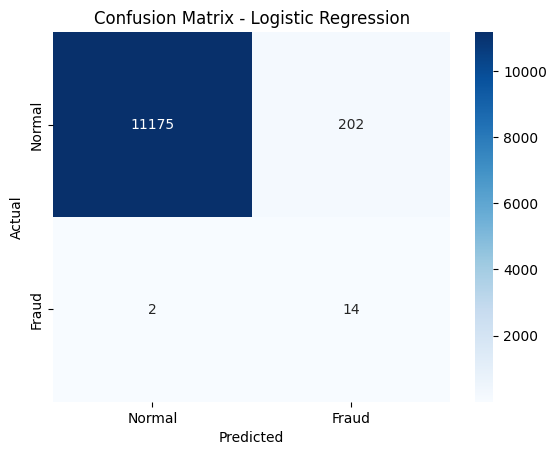


===== Random Forest =====
Confusion Matrix:
 [[11375     2]
 [    3    13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11377
           1       0.87      0.81      0.84        16

    accuracy                           1.00     11393
   macro avg       0.93      0.91      0.92     11393
weighted avg       1.00      1.00      1.00     11393

ROC AUC Score: 0.9296


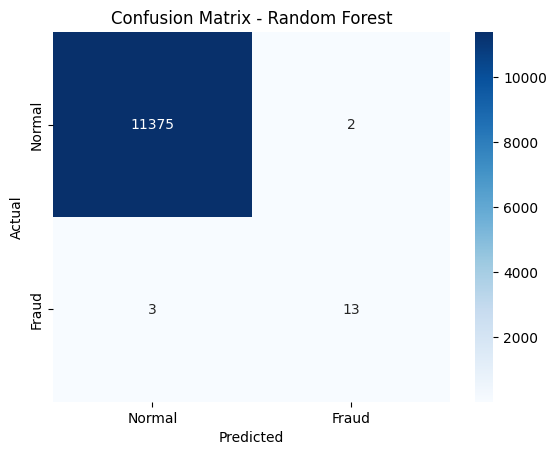


===== Gradient Boosting =====
Confusion Matrix:
 [[11343    34]
 [    2    14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11377
           1       0.29      0.88      0.44        16

    accuracy                           1.00     11393
   macro avg       0.65      0.94      0.72     11393
weighted avg       1.00      1.00      1.00     11393

ROC AUC Score: 0.9809


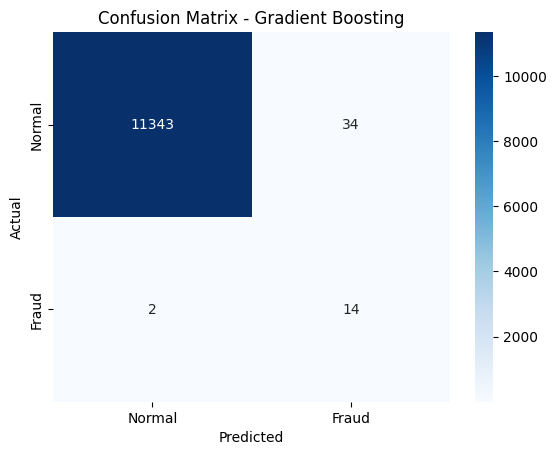

In [82]:
# Model Building and Training
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n===== {model_name} =====")
    
    # Train
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    results[model_name] = {'cm': cm, 'report': report, 'auc': auc}
    
    # Print results
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    print(f"ROC AUC Score: {auc:.4f}")
    
    # Plot confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



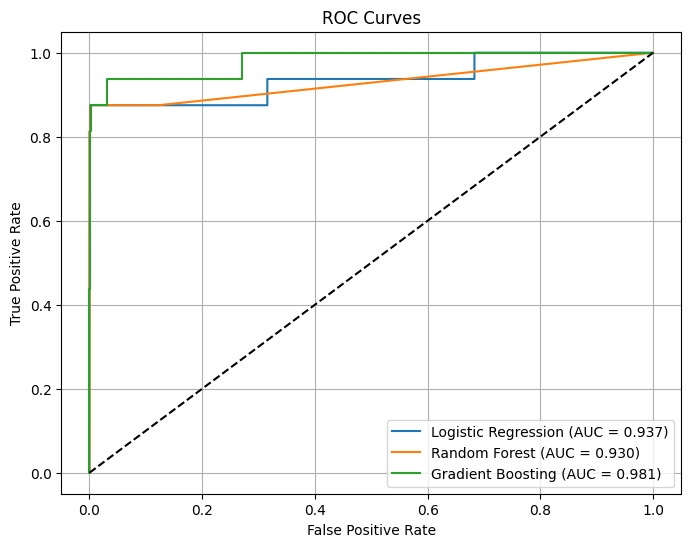

In [83]:


plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

### 🔍 1. Data Overview and Exploration
Dataset size: 56,962 rows × 30 columns.

Target Distribution:

Normal (0): 56,864 transactions

Fraud (1): 98 transactions (only ~0.17% → extremely imbalanced)



### 🧪 PCA-Transformed Features:
Features V1 to V28 are PCA components → real transaction features anonymized.

These preserve pattern and variance but obscure sensitive data — a common step in financial datasets for privacy.



### 🧼 Data Quality:
✅ No missing values

🔁 Low multicollinearity among features (confirmed via correlation heatmap)


### 💡 Insight:
The dataset is highly imbalanced and preprocessed using PCA, which helps with privacy but still needs techniques like SMOTE for better fraud detection.

### ⚖️ 2. Class Imbalance Handling
Problem: Very few fraud cases in training data → risk of models being biased toward "normal" transactions.

Solution: Applied SMOTE (Synthetic Minority Oversampling Technique)

Before SMOTE:
Normal: 45,487 | Fraud: 82

After SMOTE:
Normal: 45,487 | Fraud: 45,487 (Balanced dataset)


#### 📌 Insight:
SMOTE creates synthetic fraud examples, increasing the model’s ability to identify frauds while maintaining the original data integrity — especially important for improving recall (catching actual frauds).


### 🧠 3. Models Used
You used three supervised learning models:

Logistic Regression

Random Forest

Gradient Boosting


### 📈 4. Model Evaluation
✅ Logistic Regression
Recall (Fraud): 0.88

Precision (Fraud): 0.06

AUC: 0.9374

⚠️ Warning: Model hit max iterations (you may want to increase max_iter)


High recall but very low precision — flags too many false positives. This is common with logistic regression when classes are highly imbalanced or complex boundaries exist.

✅ Random Forest
Recall (Fraud): 0.81

Precision (Fraud): 0.87

AUC: 0.9296

Accuracy: ~100%

Insight:

Well-balanced model — catches most frauds and minimizes false positives. Strong precision and recall. Good for production.

✅ Gradient Boosting
Recall (Fraud): 0.88

Precision (Fraud): 0.29

AUC: 0.9809 (highest)

False Positives: 34 (a bit more than RF)

Insight:

Best AUC and recall, but lower precision than RF. Gradient Boosting is aggressive in identifying fraud but has a higher false positive rate.

### 📊 5. ROC Curve Analysis
Gradient Boosting clearly has the best ROC curve (AUC = 0.981), meaning it's best at separating fraud from non-fraud across all thresholds.

Random Forest is also strong with a good balance.

Logistic Regression performs adequately but suffers in precision.

